# Data Analysis on a Supermaket datset of US

Loading libraries needed 


In [175]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
sales = pd.read_csv('sales.csv')
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


In [177]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Invoice ID  1000 non-null   int64 
 1   Date        1000 non-null   object
 2   Time        1000 non-null   object
 3   Gender      1000 non-null   object
 4   Location    1000 non-null   object
 5   City        1000 non-null   object
 6   Member      1000 non-null   object
 7   Category    1000 non-null   object
 8   Price       1000 non-null   int64 
 9   Quantity    1000 non-null   int64 
 10  Total       1000 non-null   int64 
 11  Payment     1000 non-null   object
 12  Rating      1000 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [178]:
sales['Payment'].unique() # check different modes of payment

array(['Cash', 'Card', 'Gpay'], dtype=object)

# Queries to find conditional statements

In [179]:
sales.query('100 < Total < 200')

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
7,188869875,3/8/2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3
9,562942936,2/24/2018,16:05,Female,Park lane,Dallas,No,Books,80,2,160,Cash,4
10,388412668,2/26/2018,11:32,Female,Brookfield,NewYork,No,Furniture,35,4,140,Gpay,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,614557665,3/22/2018,17:16,Female,Park lane,Dallas,No,Clothing,49,3,147,Cash,5
981,418253101,3/14/2018,12:25,Female,Brookfield,NewYork,No,Fashion,81,2,162,Gpay,5
989,941364541,3/13/2018,14:53,Female,Brookfield,NewYork,No,Sporting,19,7,133,Cash,1
994,446582560,1/31/2018,19:00,Male,Water tower,Chicago,No,Fashion,29,5,145,Cash,4


In [180]:
sales.query('City == "Dallas"')

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4
7,188869875,3/8/2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3
8,325637547,1/18/2018,15:33,Male,Park lane,Dallas,Yes,Clothing,91,3,273,Card,3
9,562942936,2/24/2018,16:05,Female,Park lane,Dallas,No,Books,80,2,160,Cash,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,81079897,3/28/2018,12:12,Female,Park lane,Dallas,Yes,Fashion,64,7,448,Gpay,1
976,497734676,2/9/2018,14:14,Male,Park lane,Dallas,No,Sporting,5,4,20,Cash,3
977,614557665,3/22/2018,17:16,Female,Park lane,Dallas,No,Clothing,49,3,147,Cash,5
987,245049016,1/20/2018,10:03,Female,Park lane,Dallas,No,Furniture,74,4,296,Card,4


In [181]:
sales.query('Payment == "Cash" & City == "New York"') # we get empty table which represents there is no laction as New York

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating


# Classifying Shoppers

In [203]:
# which loction has more female customers & which location has more ?
sales.groupby(['Location','Gender']).count() # getting count of people from different location along with with gender specification

Invoice ID  Date  Time  City  Member  Category  Price  \
Location    Gender                                                          
Brookfield  Female         179   179   179   179     179       179    179   
            Male           161   161   161   161     161       161    161   
Park lane   Female         179   179   179   179     179       179    179   
            Male           153   153   153   153     153       153    153   
Water tower Female         143   143   143   143     143       143    143   
            Male           185   185   185   185     185       185    185   

                    Quantity  Total  Payment  Rating  
Location    Gender                                    
Brookfield  Female       179    179      179     179  
            Male         161    161      161     161  
Park lane   Female       179    179      179     179  
            Male         153    153      153     153  
Water tower Female       143    143      143     143  
            Male         185    185      185     185

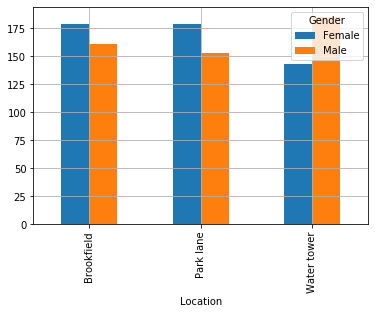

In [204]:
location_sales = sales.groupby(['Gender','Location']).count()['Invoice ID']
unstack = location_sales.unstack(level = 0) # unstack : to get the result as datframe
unstack.plot(kind = 'bar', grid = True);

# Finding Market Share

In [205]:
# Which location has higesht & lowest sales ?
location = sales.groupby('Location')
location_plot = [x for x,y in location ]
location_plot

['Brookfield', 'Park lane', 'Water tower']

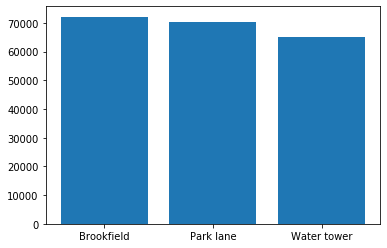

In [206]:
plt.bar(location_plot, sales.groupby('Location').sum()['Total']);

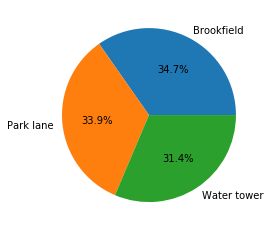

In [207]:
#representation as pie chart
plt.pie(sales.groupby('Location').sum()['Total'], labels = location_plot, autopct = '%1.1f%%');

# Analysing Membership & Rating

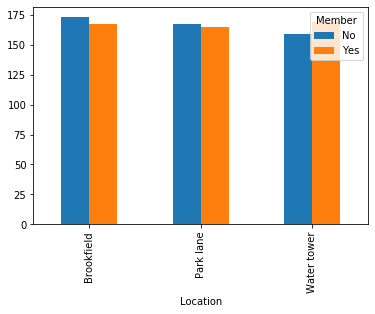

In [208]:
# Which branch has more members vs which has less memebers ?
members = sales.groupby(['Member','Location']).count()['Total']
members.unstack(level = 0).plot(kind = 'bar');


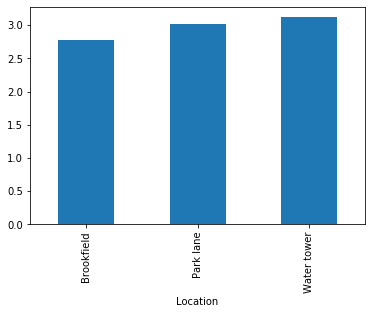

In [209]:
# Which branch has higgest rating & which has the lowest ?
rating = sales.groupby('Location').mean()['Rating']
rating.plot(kind = 'bar');

# Multiple Queries

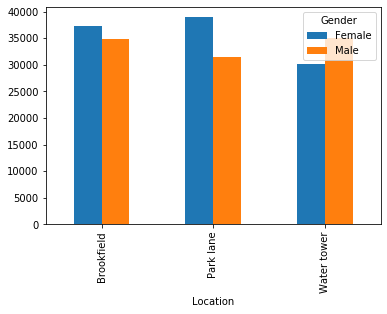

In [210]:
# Which city has more female shopping ?
shopping_f = sales.groupby(['Gender','Location']).sum()['Total']
shopping_f.unstack(level = 0).plot(kind = 'bar');

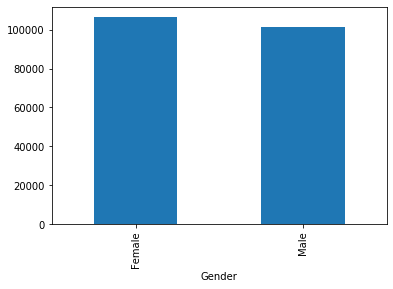

In [211]:
# Who spends more men or women ?
spend = sales.groupby('Gender').sum()['Total']
spend.plot(kind = 'bar');

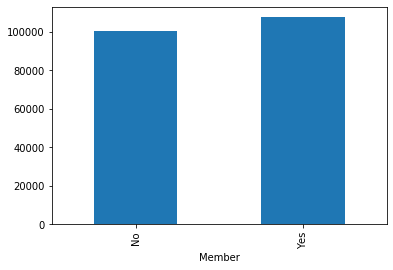

In [212]:
# Which Type of customer spends more member or non-member ?
mem = sales.groupby('Member').sum()['Total'] 
# Yes = Member
# No = Non-Member
mem.plot(kind = 'bar');

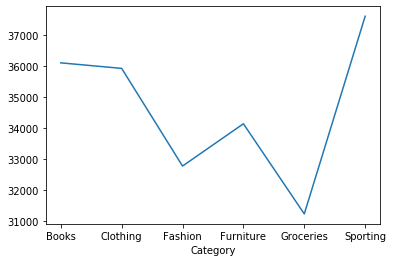

In [213]:
# Which product line sales more ?
category = sales.groupby('Category').sum()['Total']
category.plot(kind = 'line');

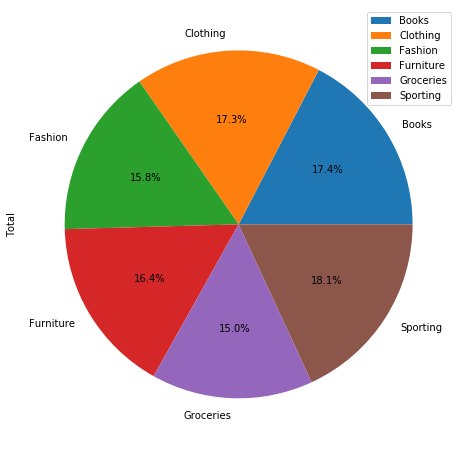

In [214]:
plt.figure(figsize = (10,8))
category.plot(kind = 'pie', autopct = '%1.1f%%');
plt.legend();


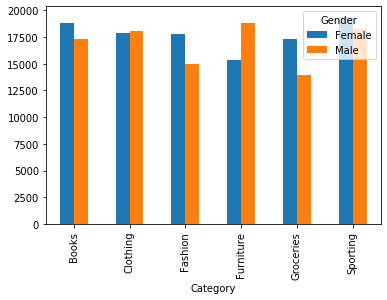

In [215]:
# Which product line is popular among men vs women ?
sale_w_m = sales.groupby(['Gender','Category']).sum()['Total']
sale_w_m.unstack(level = 0).plot(kind = 'bar');

# Classifying Sales By Days

In [216]:
# Which days of month make more sales ?
sales['Day'] = pd.to_datetime(sales['Date']).dt.day
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18


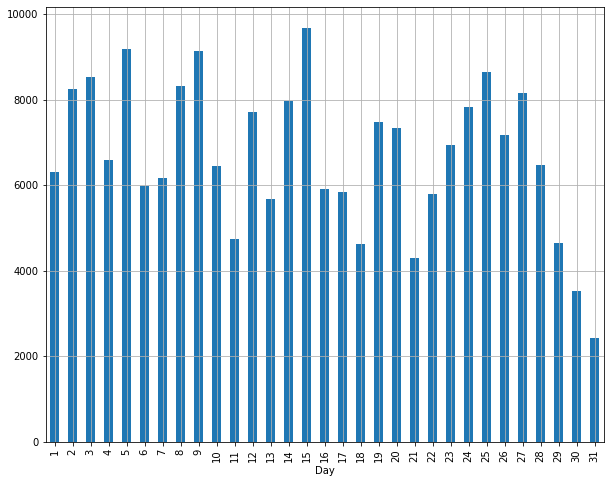

In [217]:
plt.figure(figsize = (10,8))
day_sale = sales.groupby('Day').sum()['Total']
day_sale.plot(kind = 'bar', grid = True);

# Classifying sales by month

In [218]:
# Which month of the year makes more sale ?
sales['Month'] = pd.to_datetime(sales['Date']).dt.month
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day,Month
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25,1
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25,2
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18,2


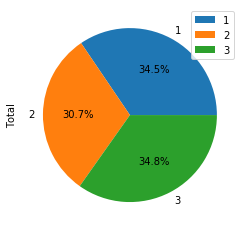

In [231]:
sales_month = sales.groupby('Month').sum()['Total']
sales_month.plot(kind = 'pie', autopct = '%1.1f%%');
plt.legend();

# Classifying sales by hour

In [232]:
sales['Time']

0      16:46
1      16:48
2      13:33
3      13:38
4      15:31
       ...  
995    11:19
996    17:17
997    11:44
998    15:44
999    10:13
Name: Time, Length: 1000, dtype: object

In [233]:
sales['Hour'] = pd.to_datetime(sales['Time']).dt.hour
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day,Month,Hour
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25,1,16
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19,3,16
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25,2,13
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22,1,13
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18,2,15


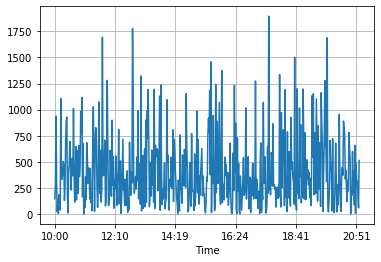

In [234]:
# Check which are the peak hours
sales_hour = sales.groupby('Time').sum()['Total']
sales_hour.plot(grid = True);

# Classifying Payment Types

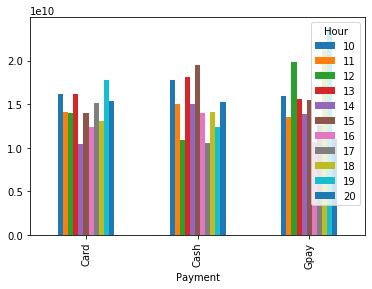

In [238]:
# What time do people make more epayments vs what time people make more cash payments ?
sales_payment_type = sales.groupby(['Hour','Payment']).sum()['Invoice ID']
sales_payment_type.unstack(level = 0).plot(kind = 'bar');